In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 127.5 - 1, test_images / 127.5 - 1

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
datagen = ImageDataGenerator()

In [4]:
model_custom = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
])

model_custom.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [5]:
history_custom = model_custom.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=20,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
1563/1563 [==============================] - 16s 5ms/step - loss: 1.4901 - accuracy: 0.0988 - val_loss: 1.1010 - val_accuracy: 0.1008
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1437 - accuracy: 0.0971 - val_loss: 0.9777 - val_accuracy: 0.0929
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0085 - accuracy: 0.0975 - val_loss: 0.8857 - val_accuracy: 0.1059
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9181 - accuracy: 0.0984 - val_loss: 0.8417 - val_accuracy: 0.1014
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8504 - accuracy: 0.0987 - val_loss: 0.8460 - val_accuracy: 0.1069
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7980 - accuracy: 0.0976 - val_loss: 0.8074 - val_accuracy: 0.1068
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7503 - accuracy: 0.1002 - val_loss: 0.8034 - val_accuracy

In [6]:
# Fine-tuning a pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze convolutional layers

model_finetuned = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_finetuned.compile(optimizer=optimizers.Adam(lr=0.0001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Fine-tune the model with data augmentation
history_finetuned = model_finetuned.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=20,
    validation_data=(test_images, test_labels)
)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5289 - accuracy: 0.0949 - val_loss: 1.2879 - val_accuracy: 0.0913
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3406 - accuracy: 0.0938 - val_loss: 1.2444 - val_accuracy: 0.0911
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2939 - accuracy: 0.0946 - val_loss: 1.2165 - val_accuracy: 0.0913
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2622 - accuracy: 0.0952 - val_loss: 1.1934 - val_accuracy: 0.0934
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2400 - accuracy: 0.0940 - val_loss: 1.1915 - val_accuracy: 0.1095
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2258 - accuracy: 0.0961 - val_loss: 1.1805 - val_accuracy: 0.1048
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/s

313/313 [==============================] - 1s 2ms/step - loss: 0.9670 - accuracy: 0.0959
Test accuracy for custom CNN model: 0.09589999914169312
313/313 [==============================] - 2s 6ms/step - loss: 1.1662 - accuracy: 0.1199
Test accuracy for fine-tuned VGG16 model: 0.11990000307559967


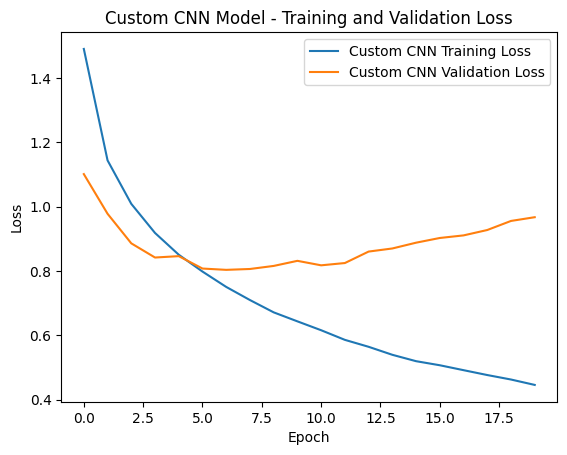

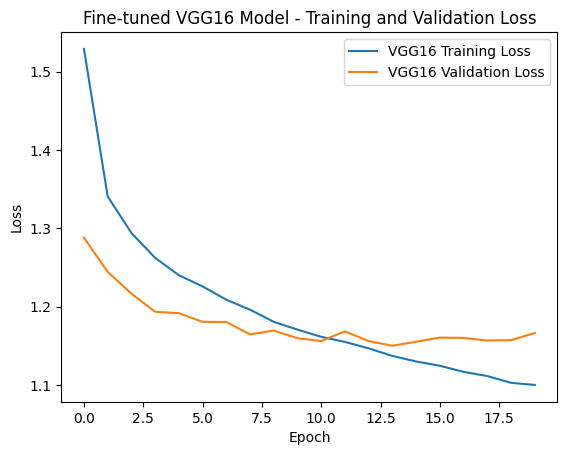

Test accuracy for custom CNN model: 0.09589999914169312
Test accuracy for fine-tuned VGG16 model: 0.11990000307559967


In [7]:
import matplotlib.pyplot as plt

# Evaluate the custom CNN model
test_loss_custom, test_acc_custom = model_custom.evaluate(test_images, test_labels)
print(f'Test accuracy for custom CNN model: {test_acc_custom}')

# Evaluate the fine-tuned VGG16 model
test_loss_finetuned, test_acc_finetuned = model_finetuned.evaluate(test_images, test_labels)
print(f'Test accuracy for fine-tuned VGG16 model: {test_acc_finetuned}')

plt.plot(history_custom.history['loss'], label='Custom CNN Training Loss')
plt.plot(history_custom.history['val_loss'], label='Custom CNN Validation Loss')
plt.title('Custom CNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_finetuned.history['loss'], label='VGG16 Training Loss')
plt.plot(history_finetuned.history['val_loss'], label='VGG16 Validation Loss')
plt.title('Fine-tuned VGG16 Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f'Test accuracy for custom CNN model: {test_acc_custom}')
print(f'Test accuracy for fine-tuned VGG16 model: {test_acc_finetuned}')